In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/GL/GLv5_GWRPM25_mean2021-2023.shp')
df

,lat,lon,GWRPM25,geometry
0,10.005000,-85.724998,15.533333,POINT (-85.725 10.005)
1,10.005000,-85.714996,15.666667,POINT (-85.715 10.005)
2,10.005000,-85.705002,15.666667,POINT (-85.705 10.005)
3,10.005000,-85.695000,14.700000,POINT (-85.695 10.005)
4,10.005000,-85.684998,14.266666,POINT (-85.685 10.005)
...,...,...,...,...
25009576,67.995003,-52.455002,1.400000,POINT (-52.455 67.995)
25009577,67.995003,-51.395000,1.400000,POINT (-51.395 67.995)
25009578,67.995003,-51.384998,1.400000,POINT (-51.385 67.995)
25009579,67.995003,-51.334999,1.400000,POINT (-51.335 67.995)


In [2]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [3]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [4]:
counties_conus = counties_conus.drop(["COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [5]:
counties_conus = counties_conus.to_crs(df.crs)

In [6]:
import geopandas as gpd
import pandas as pd

# Parameters
chunk_size = 10000  # Adjust this based on your memory capacity

# Initialize an empty list to store results
results = []

# Iterate over chunks of the data
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    chunk_result = gpd.sjoin(chunk, counties_conus[['GEOID', 'geometry','STATEFP','COUNTYFP']], how="left", predicate="within")
    chunk_result.dropna(subset=['GEOID'], inplace=True)  # Drop rows where GEOID is NaN in this chunk
    results.append(chunk_result)

# Concatenate all chunk results
df_counties = pd.concat(results, ignore_index=True)


In [7]:
df_counties

,lat,lon,GWRPM25,geometry,index_right,GEOID,STATEFP,COUNTYFP
0,18.915001,-155.675003,3.066667,POINT (-155.675 18.915),269.0,15001,15,001
1,18.924999,-155.675003,3.066667,POINT (-155.675 18.925),269.0,15001,15,001
2,18.924999,-155.664993,3.066667,POINT (-155.66499 18.925),269.0,15001,15,001
3,18.924999,-155.654999,2.900000,POINT (-155.655 18.925),269.0,15001,15,001
4,18.934999,-155.675003,3.033334,POINT (-155.675 18.935),269.0,15001,15,001
...,...,...,...,...,...,...,...,...
10191195,67.995003,-141.044998,6.166667,POINT (-141.045 67.995),2780.0,02290,02,290
10191196,67.995003,-141.035004,6.166667,POINT (-141.035 67.995),2780.0,02290,02,290
10191197,67.995003,-141.024994,6.266666,POINT (-141.02499 67.995),2780.0,02290,02,290
10191198,67.995003,-141.014999,6.300001,POINT (-141.015 67.995),2780.0,02290,02,290


In [8]:
# Group by GEOID and calculate the 90th percentile of GWRPM25 for each county
county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].quantile(0.9).reset_index()
#county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].max().reset_index()
#county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].mean().reset_index()


# Rename the column for clarity
county_90th_percentile = county_90th_percentile.rename(columns={'GWRPM25': 'PM25_90th'})

# Display the result
print(county_90th_percentile)


      GEOID  PM25_90th
0     01001   7.800000
1     01003   8.466667
2     01005   7.666667
3     01007   8.266667
4     01009   7.633333
...     ...        ...
3137  56037   5.466667
3138  56039   5.033333
3139  56041   6.333333
3140  56043   5.266666
3141  56045   8.766666

[3142 rows x 2 columns]


In [9]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
county_90th_percentile_with_geometry = county_90th_percentile.merge(counties[['GEOID', 'geometry','STATEFP','COUNTYFP']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
county_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')

# Display the result
print(county_90th_percentile_with_geometry)


      GEOID  PM25_90th                                           geometry  \
0     01001   7.800000  POLYGON ((-86.9212 32.65754, -86.92035 32.6585...   
1     01003   8.466667  POLYGON ((-88.02858 30.22676, -88.02399 30.230...   
2     01005   7.666667  POLYGON ((-85.74803 31.61918, -85.74544 31.618...   
3     01007   8.266667  POLYGON ((-87.42194 33.00338, -87.33177 33.005...   
4     01009   7.633333  POLYGON ((-86.96336 33.85822, -86.95967 33.857...   
...     ...        ...                                                ...   
3137  56037   5.466667  POLYGON ((-110.05438 42.01103, -110.05436 42.0...   
3138  56039   5.033333  POLYGON ((-111.05361 44.66627, -110.75076 44.6...   
3139  56041   6.333333  POLYGON ((-111.04663 41.14012, -111.04662 41.1...   
3140  56043   5.266666  POLYGON ((-108.55063 44.15179, -108.55056 44.1...   
3141  56045   8.766666  POLYGON ((-105.08123 43.65128, -105.0808 43.71...   

     STATEFP COUNTYFP  
0         01      001  
1         01      003  
2  

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata

# Merge the two DataFrames on 'GEOID' to get matched pairs for CDV and CDVE

# Drop rows with NaN values in either column

# Compute rank values
county_90th_percentile_with_geometry['CDVE_rank'] = rankdata(-county_90th_percentile_with_geometry['PM25_90th'], method='min')

county_90th_percentile_with_geometry

,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank
0,01001,7.800000,"POLYGON ((-86.9212 32.65754, -86.92035 32.6585...",01,001,1085
1,01003,8.466667,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",01,003,413
2,01005,7.666667,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",01,005,1230
3,01007,8.266667,"POLYGON ((-87.42194 33.00338, -87.33177 33.005...",01,007,599
4,01009,7.633333,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",01,009,1278
...,...,...,...,...,...,...
3137,56037,5.466667,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",56,037,2954
3138,56039,5.033333,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",56,039,3035
3139,56041,6.333333,"POLYGON ((-111.04663 41.14012, -111.04662 41.1...",56,041,2637
3140,56043,5.266666,"POLYGON ((-108.55063 44.15179, -108.55056 44.1...",56,043,2994


In [11]:
county_90th_percentile_with_geometry.to_csv('/data/acker/ALA/ranks_washu_max_2021-2023.csv')

In [12]:
# epa CDVs for pearson
gdf_epa = pd.read_csv('/data/acker/EPA_DV/2021-2023.csv')

In [13]:
gdf_epa

,State Name,County Name,State FIPS,County FIPS,Design Value
0,Alabama,Baldwin,1,3,7.4
1,Alabama,Clay,1,27,7.3
2,Alabama,DeKalb,1,49,7.8
3,Alabama,Jefferson,1,73,9.6
4,Alabama,Madison,1,89,7.7
...,...,...,...,...,...
532,Wyoming,Natrona,56,25,3.7
533,Wyoming,Park,56,29,4.5
534,Wyoming,Sheridan,56,33,7.0
535,Wyoming,Sublette,56,35,3.7


In [14]:
#gdf_epa.rename(columns={'2016-2018': 'Design Value'}, inplace=True)

In [15]:

# Function to add leading zero to 11-digit codes
def add_leading_zero(code):
    code_str = str(code).strip()
    if len(code_str) == 1:
        ret = '0' + code_str
        return ret
    return code_str

In [16]:
# Iterate through each block group ID in ejscreen and update if necessary
for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'State FIPS'] = add_leading_zero(gdf_epa.at[i, 'State FIPS'])

# Iterate through each block group ID in ejscreen and update if necessary
for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


/tmp/ipykernel_363443/958764295.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_epa.at[i, 'State FIPS'] = add_leading_zero(gdf_epa.at[i, 'State FIPS'])
/tmp/ipykernel_363443/958764295.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '03' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


In [17]:

# Function to add leading zero to 11-digit codes
def add_leading_zero(code):
    code_str = str(code).strip()
    if len(code_str) == 2:
        ret = '0' + code_str
        return ret
    return code_str


for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


In [18]:
gdf_epa

,State Name,County Name,State FIPS,County FIPS,Design Value
0,Alabama,Baldwin,01,003,7.4
1,Alabama,Clay,01,027,7.3
2,Alabama,DeKalb,01,049,7.8
3,Alabama,Jefferson,01,073,9.6
4,Alabama,Madison,01,089,7.7
...,...,...,...,...,...
532,Wyoming,Natrona,56,025,3.7
533,Wyoming,Park,56,029,4.5
534,Wyoming,Sheridan,56,033,7.0
535,Wyoming,Sublette,56,035,3.7


In [19]:
county_90th_percentile_with_geometry.columns

Index(['GEOID', 'PM25_90th', 'geometry', 'STATEFP', 'COUNTYFP', 'CDVE_rank'], dtype='object')

In [20]:
import numpy as np

# Set values that are 0 in 'Design Value' to NaN in gdf_epa
gdf_epa.loc[gdf_epa['Design Value'] == 0, 'Design Value'] = np.nan

# Drop rows where 'Design Value' is NaN, so only counties with valid EPA data remain
gdf_epa.dropna(subset=['Design Value'], inplace=True)

# Step 1: Create a unique identifier combining 'STUSPS' and 'NAME' for both datasets
gdf_epa['ID'] = gdf_epa['State FIPS'] + "_" + gdf_epa['County FIPS']
county_90th_percentile_with_geometry['ID'] = county_90th_percentile_with_geometry['STATEFP'] + "_" + county_90th_percentile_with_geometry['COUNTYFP']

# Step 2: Identify IDs with valid values in gdf_epa
epa_ids = gdf_epa['ID'].unique()

# Step 3: Identify unmonitored counties
unmonitored_counties = county_90th_percentile_with_geometry[
    ~county_90th_percentile_with_geometry['ID'].isin(epa_ids)
]

# Step 4: Update PM25_90th in county_90th_percentile_with_geometry to NaN for IDs not in epa_ids
county_90th_percentile_with_geometry.loc[
    ~county_90th_percentile_with_geometry['ID'].isin(epa_ids), 'PM25_90th'
] = np.nan


In [21]:
len(epa_ids)

537

In [22]:
unmonitored_counties

,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank,ID
0,01001,7.800000,"POLYGON ((-86.9212 32.65754, -86.92035 32.6585...",01,001,1085,01_001
2,01005,7.666667,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",01,005,1230,01_005
3,01007,8.266667,"POLYGON ((-87.42194 33.00338, -87.33177 33.005...",01,007,599,01_007
4,01009,7.633333,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",01,009,1278,01_009
5,01011,7.333333,"POLYGON ((-85.99926 32.25018, -85.98655 32.250...",01,011,1680,01_011
...,...,...,...,...,...,...,...
3134,56031,5.833333,"POLYGON ((-105.28651 42.60583, -105.25054 42.6...",56,031,2850,56_031
3137,56037,5.466667,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",56,037,2954,56_037
3139,56041,6.333333,"POLYGON ((-111.04663 41.14012, -111.04662 41.1...",56,041,2637,56_041
3140,56043,5.266666,"POLYGON ((-108.55063 44.15179, -108.55056 44.1...",56,043,2994,56_043


In [23]:
county_90th_percentile_with_geometry.dropna(inplace=True)

In [24]:
# Rank counties from highest to lowest based on PM25_90th values
county_ranked_epa = gdf_epa.sort_values(by='Design Value', ascending=False).reset_index(drop=True)
county_ranked_epa.reset_index(inplace=True)
county_ranked_epa['Design Value']

0      16.2
1      15.7
2      14.8
3      14.4
4      14.1
       ... 
532     3.7
533     3.6
534     3.5
535     3.4
536     2.7
Name: Design Value, Length: 537, dtype: float64

In [25]:
# Rank counties from highest to lowest based on PM25_90th values
county_ranked = county_90th_percentile_with_geometry.sort_values(by='PM25_90th', ascending=False).reset_index(drop=True)
county_ranked.reset_index(inplace=True)
county_ranked

,index,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank,ID
0,0,02090,14.333333,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",02,090,1,02_090
1,1,06063,14.200000,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",06,063,2,06_063
2,2,06107,12.933334,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",06,107,4,06_107
3,3,06023,12.633334,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",06,023,5,06_023
4,4,06029,12.599999,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",06,029,6,06_029
...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",02,020,3118,02_020
532,532,02110,3.900000,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",02,110,3128,02_110
533,533,15001,3.633333,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",15,001,3133,15_001
534,534,15009,3.556667,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",15,009,3136,15_009


In [26]:
county_90th_percentile_with_geometry

,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank,ID
1,01003,8.466667,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",01,003,413,01_003
13,01027,7.600000,"POLYGON ((-86.17416 33.11241, -86.17392 33.121...",01,027,1313,01_027
24,01049,7.500000,"POLYGON ((-86.11889 34.40384, -86.11002 34.403...",01,049,1435,01_049
36,01073,9.266666,"POLYGON ((-87.34095 33.47109, -87.33833 33.474...",01,073,132,01_073
44,01089,8.356666,"POLYGON ((-86.78955 34.56799, -86.78869 34.597...",01,089,532,01_089
...,...,...,...,...,...,...,...
3131,56025,5.933333,"POLYGON ((-107.54353 42.78136, -107.50142 42.7...",56,025,2822,56_025
3133,56029,5.433333,"POLYGON ((-111.05456 45.00096, -111.04507 45.0...",56,029,2962,56_029
3135,56033,6.300000,"POLYGON ((-107.91152 45.00067, -107.90818 45.0...",56,033,2662,56_033
3136,56035,4.866667,"POLYGON ((-110.62343 42.7792, -110.60511 42.77...",56,035,3061,56_035


In [27]:
import numpy as np
from scipy.stats import rankdata

# Merge the two DataFrames on 'GEOID' to get matched pairs for CDV and CDVE
# CDV (CDV) = Design Value from county_ranked_epa
# CDVE (calculated satellite value) = PM25_90th from county_ranked
merged_df = county_ranked.merge(county_ranked_epa[['ID', 'Design Value']], on='ID', how='inner')
print(merged_df.columns)
# Drop rows with NaN values in either column, only keep counties with both values
merged_df.dropna(subset=['PM25_90th', 'Design Value'], inplace=True)
print(merged_df.columns)
# Extract CDV and CDVE values for correlation calculations
cdv = merged_df['Design Value'].values  # EPA design values (CDV)
cdve = merged_df['PM25_90th'].values  # 90th percentile PM2.5 values (CDVE)

# Calculate Pearson correlation coefficient
cdv_mean = np.mean(cdv)
cdve_mean = np.mean(cdve)
numerator = np.sum((cdv - cdv_mean) * (cdve - cdve_mean))
denominator = np.sqrt(np.sum((cdv - cdv_mean)**2) * np.sum((cdve - cdve_mean)**2))
pearson_correlation = numerator / denominator

# Calculate Spearman rank correlation coefficient
cdv_ranks = rankdata(cdv, method='min')
cdve_ranks = rankdata(cdve, method='min')
d_i = cdv_ranks - cdve_ranks
n = len(cdv)
spearman_numerator = 6 * np.sum(d_i**2)
spearman_denominator = n * (n**2 - 1)
spearman_correlation = 1 - (spearman_numerator / spearman_denominator)

# Print the results
print("Pearson Correlation Coefficient (r):", pearson_correlation)
print("Spearman Rank Correlation Coefficient (r_s):", spearman_correlation)


Index(['index', 'GEOID', 'PM25_90th', 'geometry', 'STATEFP', 'COUNTYFP',
       'CDVE_rank', 'ID', 'Design Value'],
      dtype='object')
Index(['index', 'GEOID', 'PM25_90th', 'geometry', 'STATEFP', 'COUNTYFP',
       'CDVE_rank', 'ID', 'Design Value'],
      dtype='object')
Pearson Correlation Coefficient (r): 0.7357383079744567
Spearman Rank Correlation Coefficient (r_s): 0.6943597160649008


In [28]:
from scipy.stats import pearsonr, spearmanr

pearson_r, _ = pearsonr(cdv, cdve)
spearman_r, _ = spearmanr(cdv, cdve)

print("Pearson Correlation (scipy):", pearson_r)
print("Spearman Correlation (scipy):", spearman_r)

Pearson Correlation (scipy): 0.7357383079744567
Spearman Correlation (scipy): 0.6965721511026052


In [29]:
merged_df

,index,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value
0,0,02090,14.333333,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",02,090,1,02_090,12.1
1,1,06063,14.200000,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",06,063,2,06_063,14.0
2,2,06107,12.933334,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",06,107,4,06_107,15.7
3,3,06023,12.633334,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",06,023,5,06_023,6.9
4,4,06029,12.599999,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",06,029,6,06_029,16.2
...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",02,020,3118,02_020,5.1
532,532,02110,3.900000,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",02,110,3128,02_110,4.6
533,533,15001,3.633333,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",15,001,3133,15_001,4.4
534,534,15009,3.556667,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",15,009,3136,15_009,4.0


In [30]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['diff'].describe()

count    536.000000
mean       0.064832
std        1.227862
min       -5.333334
25%       -0.533333
50%        0.133334
75%        0.775000
max        5.733334
Name: diff, dtype: float64

In [31]:
merged_df['diff'] =  abs(merged_df['PM25_90th'] - merged_df['Design Value'])
merged_df['diff'].describe()

count    536.000000
mean       0.898078
std        0.838930
min        0.000000
25%        0.300000
50%        0.633334
75%        1.266666
max        5.733334
Name: diff, dtype: float64

In [31]:
#Finally, perhaps you could even give a sense of the degree of statistical confidence you have that a 
# CDVE value calculated at 9.0 + X μg/m3 would indeed likely be confirmed, had a corresponding CDV value 
# been obtained, to be > 9.0 μg/m3.
# Filter rows where PM25_90th > 9.0
subset = merged_df[merged_df['PM25_90th'] > 9.0]

# Count how many in this subset also have Design Value > 9.0
count_confirmed = (subset['Design Value'] > 9.0).sum()

# Total number in the subset
total = len(subset)

# Calculate empirical probability
if total > 0:
    confidence = count_confirmed / total
    print(f"Estimated P(Design Value > 9.0 | PM25_90th > 9.0): {confidence:.3f}")
else:
    print("No data points with PM25_90th > 9.0.")


Estimated P(Design Value > 9.0 | PM25_90th > 9.0): 0.583


In [32]:
matches_9 = merged_df[
    (merged_df['Design Value'] > 9.0) &
    (merged_df['PM25_90th'] > 9.0)
]
print(f"Matching counties above 9.0 µg/m³: {len(matches_9)}")
matches_12 = merged_df[
    (merged_df['Design Value'] > 12.0) &
    (merged_df['PM25_90th'] > 12.0)
]
print(f"Matching counties above 12.0 µg/m³: {len(matches_12)}")


Matching counties above 9.0 µg/m³: 63
Matching counties above 12.0 µg/m³: 6


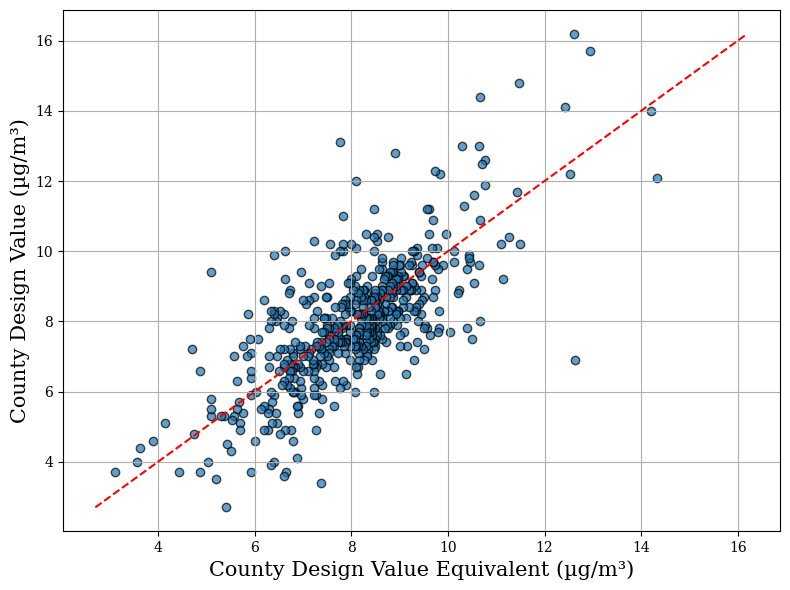

In [35]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called merged_df
x = merged_df['PM25_90th']
y = merged_df['Design Value']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, edgecolors='k')

# Add 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.rcParams["font.family"] = "serif"
# Labels and title
plt.xlabel('County Design Value Equivalent (µg/m³)',fontsize=15)
plt.ylabel('County Design Value (µg/m³)',fontsize=15)
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [340]:
unmonitored_counties.to_csv('/data/acker/ALA/washu_2021-2023_unmonitored.csv')

In [76]:
merged_df.to_csv('/data/acker/ALA/washu_2021-2023_merged.csv')

In [31]:
import pandas as pd

# Load your data into a DataFrame
# Assuming the DataFrame is already loaded and named `df`
merged_df.sort_values(by='ID', ascending=True, inplace=True)
#county_90th_percentile_with_geometry.sort_values(by='ID', ascending=True, inplace=True)

# Drop rows with NaN in either the CDV or CDVE columns
filtered_df = merged_df.copy()
# Calculate the difference (bias for each row)
filtered_df['Difference'] = merged_df['PM25_90th'].values - merged_df['Design Value'].values

# Calculate the median bias instead of the mean
bias_median = filtered_df['Difference'].median()
print(filtered_df['Difference'].describe())
# Check for NaN values in the Difference column
print("NaN values in Difference:", filtered_df['Difference'].isna().sum())


# Calculate the bias range (min and max differences)
bias_min = filtered_df['Difference'].min()
bias_max = filtered_df['Difference'].max()

print(f"Bias (median): {bias_median:.2f} µg/m³")
print(f"Bias range: {bias_min:.2f} µg/m³ to {bias_max:.2f} µg/m³")


count    536.000000
mean       0.064832
std        1.227862
min       -5.333334
25%       -0.533333
50%        0.133334
75%        0.775000
max        5.733334
Name: Difference, dtype: float64
NaN values in Difference: 0
Bias (median): 0.13 µg/m³
Bias range: -5.33 µg/m³ to 5.73 µg/m³


In [ ]:
filtered_df['Difference'].isna().sum()

0